In [209]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
digits = load_digits()
X = digits.data
Y = digits.target

In [99]:
Y[0:12]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

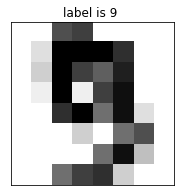

In [119]:
def plot_number_by_data(img_data, label, label_two = ""):
    plt.figure(1, figsize=(3, 3))
    plt.imshow(img_data.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"label is {label} {label_two}")
    plt.show()

def plot_number_by_index(ind):
    dt = X[ind]
    label = Y[ind]
    plot_number_by_data(dt, label)

plot_number_by_index(9)

In [201]:
def fit_estimator(estimator):
    return cross_val_score(estimator, X, Y, cv=10, n_jobs=10).mean()
    
    
def plot_invalid_labels(estimator):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=51)
    estimator.fit(X_train, y_train)
    predict = estimator.predict(X_test)
    
    fig=plt.figure(figsize=(15, 10))
    columns = 5
    rows = 4
    j = 1
    for i in np.arange(len(predict)):
        p = predict[i]
        a = y_test[i]
        if p != a:
            if j <= rows*columns:
                img = X_test[i].reshape((8,8))
                fig.add_subplot(rows, columns, j)
                plt.imshow(img)
                plt.xticks([])
                plt.yticks([])
                fig.tight_layout() 
                plt.title(f"label is {a} pr {p}")
                j+=1
    plt.show()   
    

In [187]:
fit_estimator(DecisionTreeClassifier(random_state=17))

0.82813805097605597

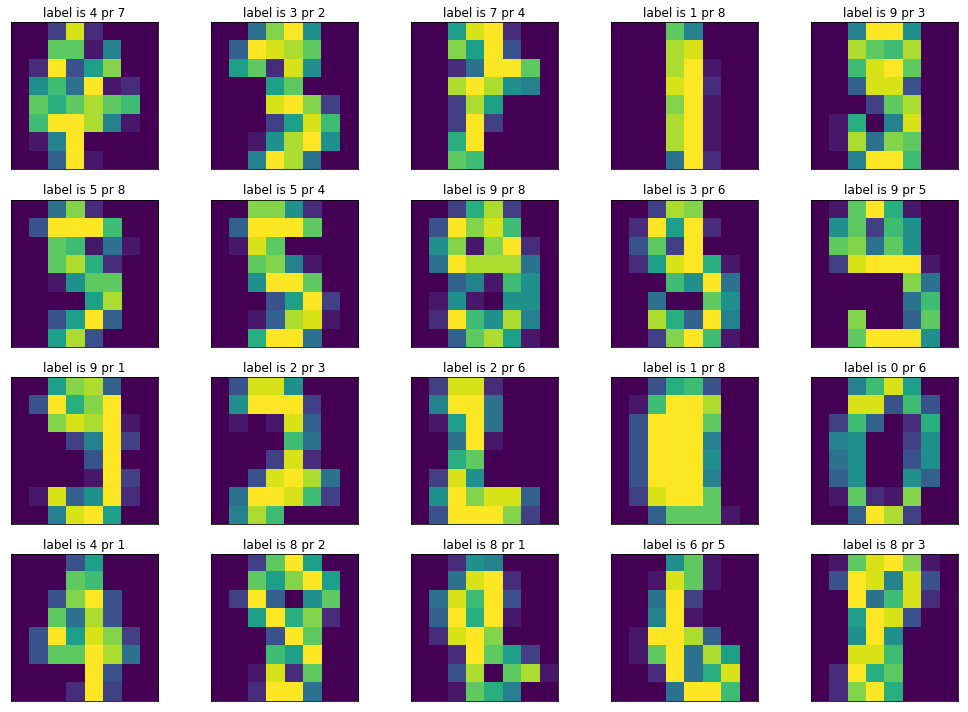

In [192]:
plot_invalid_labels(DecisionTreeClassifier(random_state=17))

In [194]:
d_tree2 = DecisionTreeClassifier(random_state=37)
bagging = BaggingClassifier(base_estimator=d_tree2, random_state=11, n_estimators=100)
fit_estimator(bagging)

0.92373845194412973

In [197]:
d_tree = DecisionTreeClassifier(random_state=37)
bagging = BaggingClassifier(base_estimator=d_tree, random_state=11, n_estimators=100, 
                            max_features=int(np.sqrt(X.shape[1])))
fit_estimator(bagging)

0.93724567203048781

In [199]:
d_tree = DecisionTreeClassifier(random_state=37, max_features=int(np.sqrt(X.shape[1])))
bagging = BaggingClassifier(base_estimator=d_tree, random_state=11, n_estimators=100)
fit_estimator(bagging)

0.95331794341937481

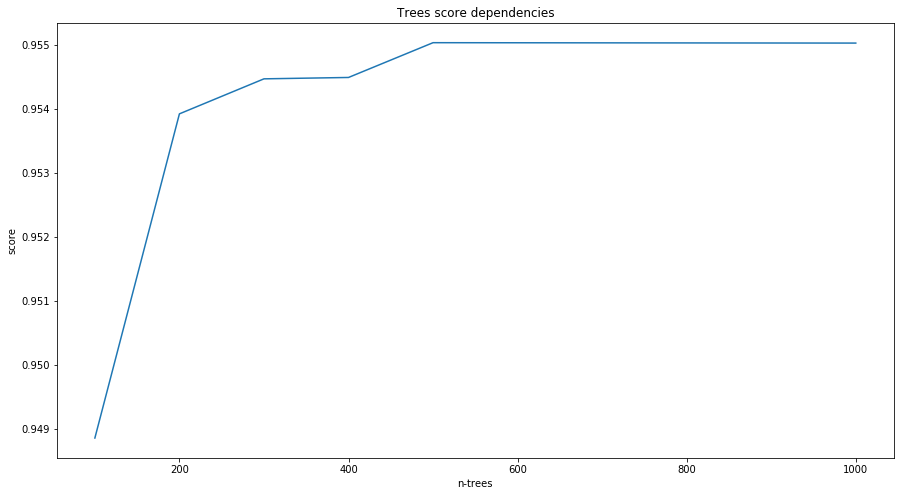

CPU times: user 1.3 s, sys: 438 ms, total: 1.74 s
Wall time: 45.6 s


In [212]:
%%time
def plot_rf_trees_score():
    trees = [100, 200, 300, 400, 500, 1000]
    results = []
    for tree in trees:
        rf = RandomForestClassifier(n_estimators=tree)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()    

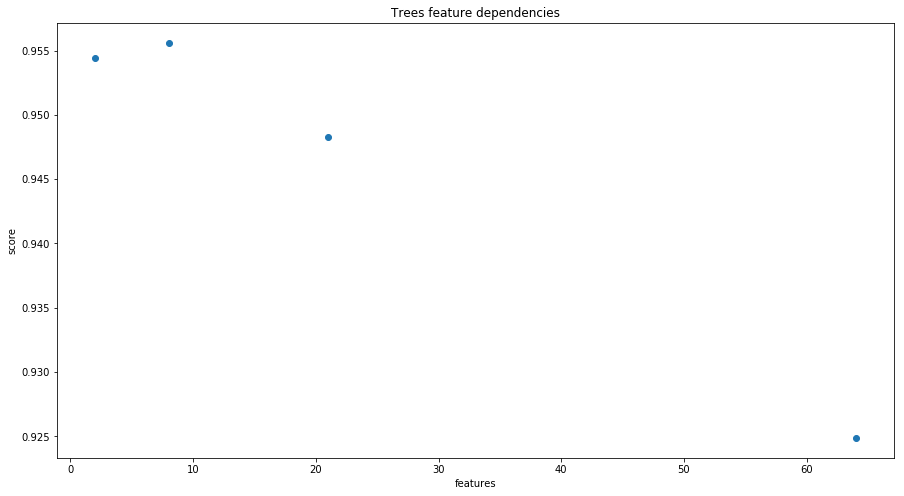

CPU times: user 1.06 s, sys: 322 ms, total: 1.38 s
Wall time: 53.3 s


In [213]:
%%time
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_features=f)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features() 

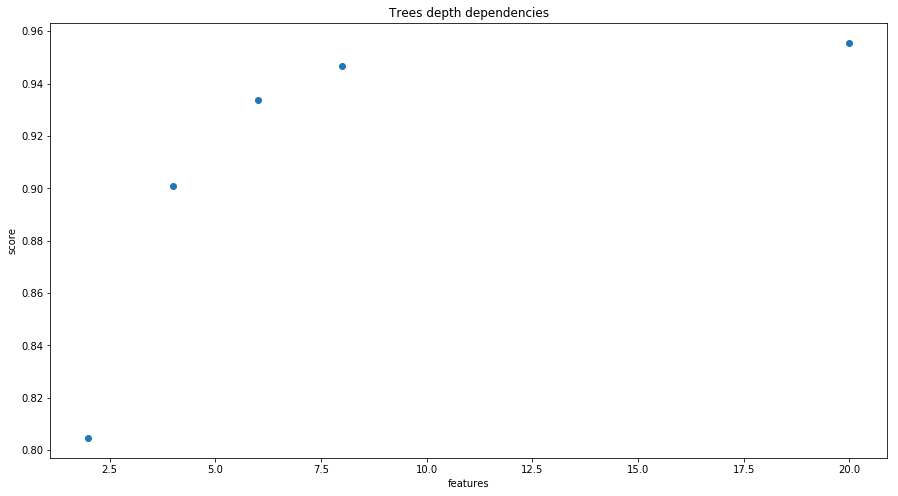

CPU times: user 1.12 s, sys: 365 ms, total: 1.48 s
Wall time: 28.3 s


In [214]:
%%time
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 4, 6, 8, 20]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_depth=d)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth() 